<a href="https://colab.research.google.com/github/sanasahana23/codealpha_tasks/blob/main/eda_analysis_TASK02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK-2

In [3]:
import pandas as pd

# Load the cleaned CSV file you saved earlier
df = pd.read_csv('all_quotes_clean_no_quotes.csv')

# Check first 5 rows
print(df.head())


                                               Quote           Author  \
0  The world as we have created it is a process o...  Albert Einstein   
1  It is our choices, Harry, that show what we tr...     J.K. Rowling   
2  There are only two ways to live your life. One...  Albert Einstein   
3  The person, be it gentleman or lady, who has n...      Jane Austen   
4  Imperfection is beauty, madness is genius and ...   Marilyn Monroe   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  


In [5]:
# Get number of rows and columns
print(f"Dataset shape: {df.shape}")

# Check for missing values
print(df.isnull().sum())

# Get column names
print(df.columns)


Dataset shape: (100, 3)
Quote     0
Author    0
Tags      3
dtype: int64
Index(['Quote', 'Author', 'Tags'], dtype='object')


In [6]:
# Unique authors count
unique_authors = df['Author'].nunique()
print(f"Unique authors: {unique_authors}")

# Unique tags count
# First split tags (assuming tags are comma separated strings)
all_tags = df['Tags'].dropna().str.split(',').explode().str.strip()
unique_tags = all_tags.nunique()
print(f"Unique tags: {unique_tags}")


Unique authors: 50
Unique tags: 137


In [7]:
top_authors = df['Author'].value_counts().head(10)
print(top_authors)


Author
Albert Einstein      10
J.K. Rowling          9
Marilyn Monroe        7
Dr. Seuss             6
Mark Twain            6
Jane Austen           5
C.S. Lewis            5
Bob Marley            3
Mother Teresa         2
Eleanor Roosevelt     2
Name: count, dtype: int64


In [8]:
top_tags = all_tags.value_counts().head(10)
print(top_tags)


Tags
love             14
inspirational    13
life             13
humor            12
books            11
reading           7
friendship        5
friends           4
truth             4
death             3
Name: count, dtype: int64


In [9]:
# Add a new column for quote length (number of characters)
df['Quote_Length'] = df['Quote'].str.len()

# Basic stats on quote length
print(df['Quote_Length'].describe())

# Find the shortest and longest quotes
print("Shortest quote:", df.loc[df['Quote_Length'].idxmin()]['Quote'])
print("Longest quote:", df.loc[df['Quote_Length'].idxmax()]['Quote'])


count     100.000000
mean      120.250000
std       133.747416
min        32.000000
25%        64.500000
50%        84.000000
75%       123.000000
max      1082.000000
Name: Quote_Length, dtype: float64
Shortest quote: We read to know we're not alone.
Longest quote: This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for 

In [10]:
!pip install matplotlib seaborn


<ipython-input-11-8e53814f9060>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


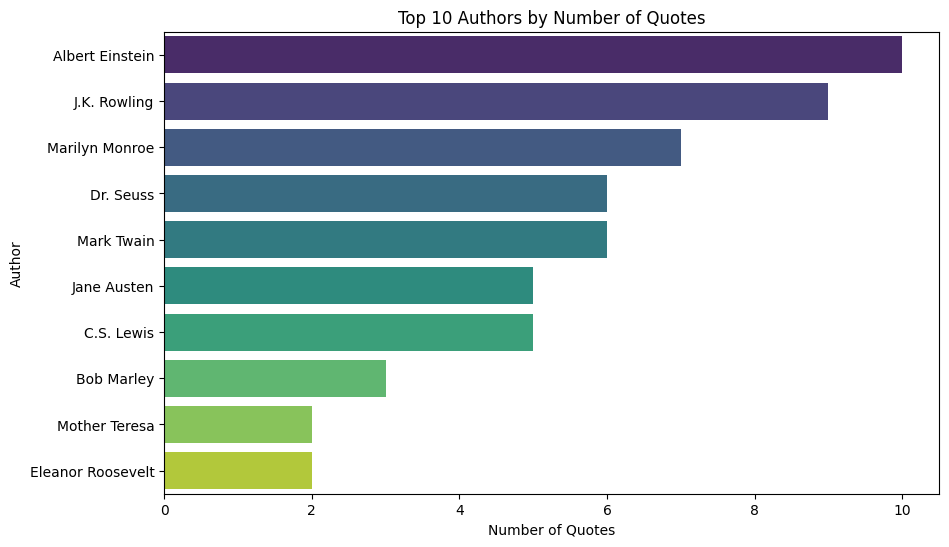

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Quotes')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
plt.show()


<ipython-input-12-eac70217f39a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='magma')


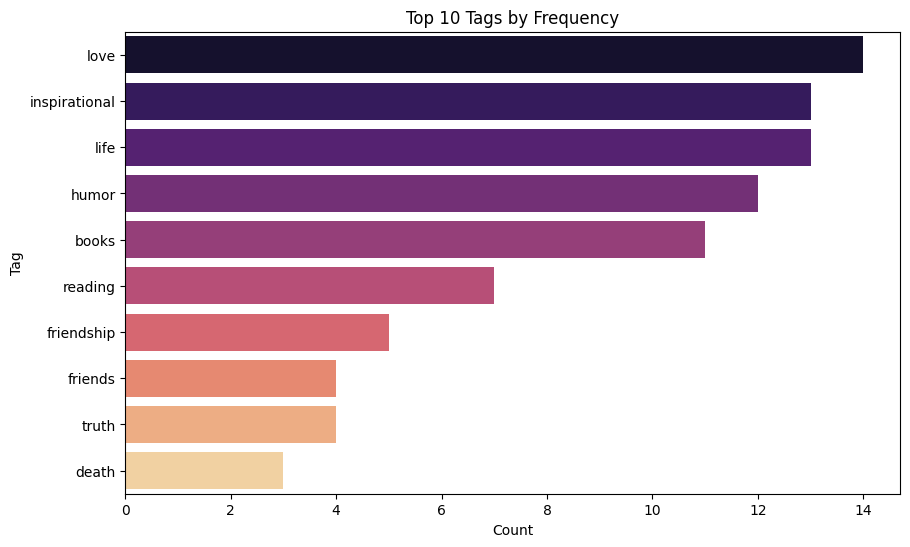

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='magma')
plt.title('Top 10 Tags by Frequency')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()


In [13]:
# First explode tags again for clarity
df_tags = df.copy()
df_tags['Tags'] = df_tags['Tags'].str.split(',')
df_tags = df_tags.explode('Tags')
df_tags['Tags'] = df_tags['Tags'].str.strip()

# Create pivot table: count of quotes for each author-tag pair
author_tag_counts = df_tags.pivot_table(index='Author', columns='Tags', aggfunc='size', fill_value=0)

# Show top authors for the top tag (example: the most frequent tag)
top_tag = top_tags.index[0]
print(f"Top authors for tag '{top_tag}':")
print(author_tag_counts[top_tag].sort_values(ascending=False).head(10))


Top authors for tag 'love':
Author
Marilyn Monroe         3
Jane Austen            2
André Gide             1
Elie Wiesel            1
Bob Marley             1
Friedrich Nietzsche    1
James Baldwin          1
C.S. Lewis             1
Alfred Tennyson        1
J.M. Barrie            1
Name: love, dtype: int64


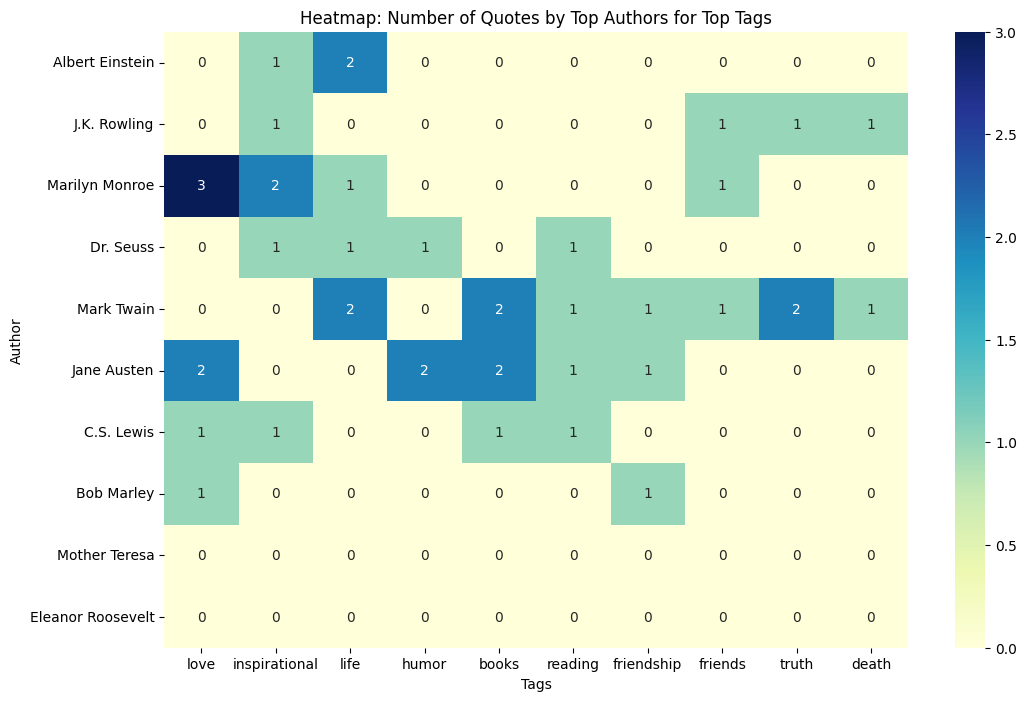

In [14]:
plt.figure(figsize=(12,8))
# Take top 10 authors by total quotes for clearer heatmap
top_10_authors = df['Author'].value_counts().head(10).index
subset = author_tag_counts.loc[top_10_authors, top_tags.index[:10]]  # top 10 tags too

sns.heatmap(subset, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heatmap: Number of Quotes by Top Authors for Top Tags')
plt.show()
